Кабанова Е. R42951  
Лабораторная работа №4  
Численное решение дифференциальны уравнений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='DejaVu Sans')

In [2]:
def EulerIntegrator(h,y0,f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времения,
    f(y) - правая часть дифференциального уравнения.
    Возвращает приближенное значение y(h).
    """
    return y0+h*f(y0)

def oneStepErrorPlot(f, y, integrator):
    """Рисует график зависимости погрешности одного шага
    интегрирования от длины шага.
    f(y) - правая часть дифференциального уравнения,
    y(t) - точное решение,
    integrator(h,y0,f) - аргументы аналогичны EulerIntegrator.
    """
    eps=np.finfo(float).eps
    steps=np.logspace(-10,0,50) # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=[y(t) for t in steps] # точные значения решения
    yApproximate=[integrator(t,y0,f) for t in steps] # приближенные решения
    h=[np.maximum(np.max(np.abs(yp-ya)),eps) for yp, ya in zip(yPrecise, yApproximate)]
    plt.loglog(steps, h, '-')
    plt.xlabel(u"Шаг интегрирования")
    plt.ylabel(u"Погрешность одного шага") 
    
def firstOrderPlot():
    """Рисует на текущем графике прямую y=x."""
    ax = plt.gca()
    steps=np.asarray(ax.get_xlim())
    plt.loglog(steps, steps, '--r')

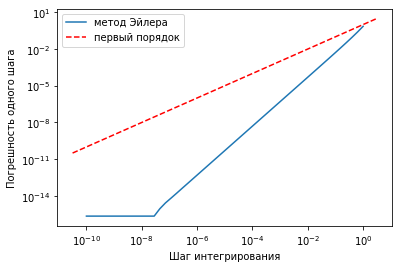

In [3]:
# Тестовая система.
# Правая часть уравнения y'=f(y).
f=lambda y: y
# Аналитическое решение
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"первый порядок"],loc=2)
plt.show()

In [5]:
def integrate(N, delta, f, y0, integrator):
    """
    Делает N шагов длины delta метода integrator для уравнения y'=f(y) с начальными условиями y0.
    Возвращает значение решения в конце интервала.
    """
    for n in range(N):
        y0=integrator(delta, y0, f)
    return y0

def intervalErrorPlot(f, y, integrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16):
    """
    Рисует график зависимости погрешности интегрирования на интервале
    от длины шага интегрирвания.
    Аргументы повторяют аргументы oneStepErrorPlot.
    """
    eps=np.finfo(float).eps
    numberOfSteps=np.logspace(0,np.log10(maxNumberOfSteps),numberOfPointsOnPlot).astype(np.int)
    steps=T/numberOfSteps # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=y(T) # точнре значения решения на правом конце
    yApproximate=[integrate(N,T/N,f,y0,integrator) for N in numberOfSteps] # приближенные решения
    h=[np.maximum(np.max(np.abs(yPrecise-ya)),eps) for ya in yApproximate]
    plt.loglog(steps, h, '.-')
    plt.xlabel("Шаг интегрирования")
    plt.ylabel("Погрешность интегрования на интервале")

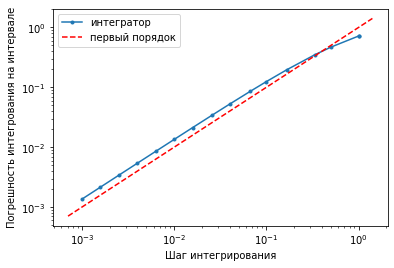

In [6]:
# Строим график ошибок
intervalErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend(["интегратор","первый порядок"],loc=2)
plt.show()

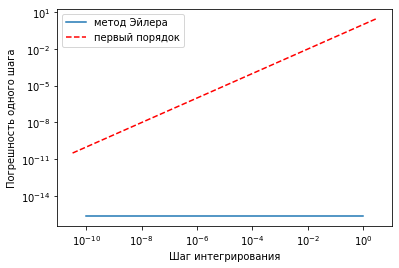

In [7]:
f=lambda y: 1
yExact=lambda t: t

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"первый порядок"],loc=2)
plt.show()

In [8]:
def NewtonIntegrator(h,y0,f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времения,
    f(y) - правая часть дифференциального уравнения и его производная.
    Возвращает приближенное значение y(h).
    """
    return y0+h*f[0](y0)+f[0](y0)*f[1](y0)*h*h/2

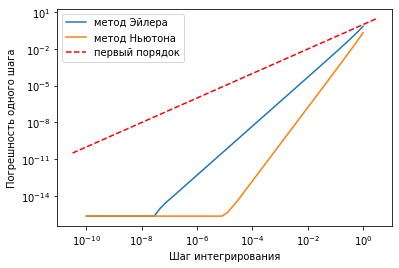

In [9]:
f=(lambda y: y, lambda y: 1)
# Аналитическое решение
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, NewtonIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"метод Ньютона",u"первый порядок"],loc=2)
plt.show()

In [10]:
def ModifiedEulerIntegrator(h,y0,f):
    """
    Модифицированный метод Эйлера. 
    Аргументы аналогичны EulerIntegrator.
    """
    yIntermediate=y0+f(y0)*h/2
    return y0+h*f(yIntermediate)

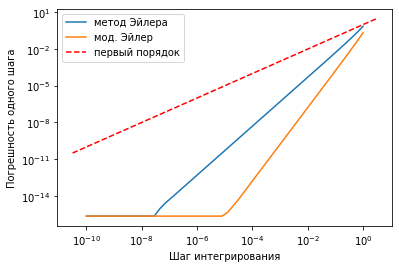

In [11]:
f=lambda y: y
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"мод. Эйлер",u"первый порядок"],loc=2)
plt.show()

In [12]:
def RungeKuttaIntegrator(h,y0,f):
    """
    Классический метод Рунге-Кутты четвертого порядка. 
    Аргументы аналогичны EulerIntegrator.
    """
    k1=f(y0)
    k2=f(y0+k1*h/2)
    k3=f(y0+k2*h/2)
    k4=f(y0+k3*h)
    return y0+(k1+2*k2+2*k3+k4)*h/6

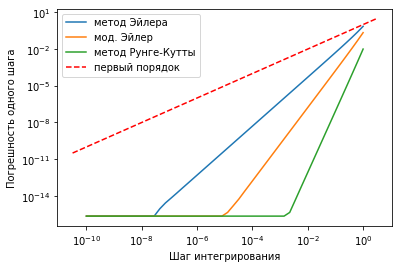

In [13]:
f=lambda y: y
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
oneStepErrorPlot(f, yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"мод. Эйлер",u"метод Рунге-Кутты",u"первый порядок"],loc=2)
plt.show()

In [14]:
def NewtonMethod(F, x0):
    """
    Находит решение уравнения F(x)=0 методом Ньютона.
    x0 - начальное приближение.
    F=(F(x),dF(x)) - функция и ее производная.
    Возвращает решение уравнения.
    """
    for i in range(100): # ограничиваем максимальное число итераций
        x=x0-F[0](x0)/F[1](x0)
        if x==x0: break # достигнута максимальная точность
        x0=x
    return x0

def BackwardEulerIntegrator(h,y0,f):
    """
    Неявный метод Эйлера. 
    Аргументы аналогичны NewtonIntegrator.
    """
    F=(lambda y: y0+h*f[0](y)-y, lambda y: h*f[1](y)-1)
    return NewtonMethod(F,y0)

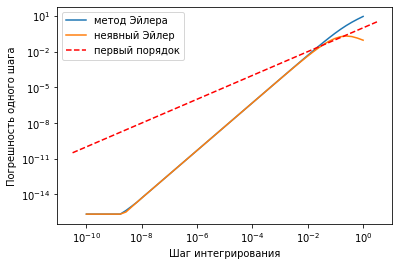

In [15]:
alpha=-10
f=(lambda y: alpha*y, lambda y: alpha)
yExact=lambda t: np.exp(alpha*t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, BackwardEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"неявный Эйлер",u"первый порядок"],loc=2)
plt.show()

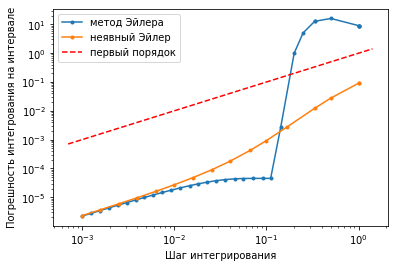

In [16]:
intervalErrorPlot(f[0], yExact, EulerIntegrator,numberOfPointsOnPlot=32)
intervalErrorPlot(f, yExact, BackwardEulerIntegrator,numberOfPointsOnPlot=16)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"неявный Эйлер",u"первый порядок"],loc=2)
plt.show()

Порядок интегрирования – это зависимость точности от величины шага.

In [18]:
f2=lambda y: -y
def analytical_solution(A, B, x):
    return A*np.cos(x)+B*np.sin(x)

def step(method, y, tmax, n):
    global yRange
    delta = tmax / (n - 1)
    
    for i in range(n):
        y, yRange = method(y, yRange, delta)
    yRange = 0
    
    return y

t0 = 0
def RungeKutta_step(y0, yRange, delta):
    k1 = f2(y0)
    k2 = f2(y0 + k1*delta/2)
    k3 = f2(y0 + k1*delta/2)
    k4 = f2(y0 + k3 * delta)
    
    yRange = yRange + (k1+2*k2+2*k3+k4)*delta/6
    y0 = y0 + yRange*delta
    
    return y0, yRange

def Euler_step(y0, yRange, delta):
    y_delta = yRange - y0*delta
    y = y0 + yRange*delta
    
    return y, y_delta

def collect_plot_data(tmax, n):
    d = tmax / (n - 1)
    t = 0.
    y_RK, yRange_RK = 1, 0
    y_EU, yRange_EU = 1, 0
    analitical_data = []
    RungeKutta_data = []
    Euler_data = []
    RungeKutta_Error = []
    Euler_Error = []
    data = []
    for i in range(n):
        data.append(t)
        analytics = analytical_solution(1, 0, t)
        analitical_data.append(analytics)
        y_RK, yRange_RK = RungeKutta_step(y_RK, yRange_RK, d)
        y_EU, yRange_EU = Euler_step(y_EU, yRange_EU, d)
        RungeKutta_data.append(y_RK)
        RungeKutta_Error.append(abs(analytics-y_RK))
        Euler_data.append(y_EU)
        Euler_Error.append(abs(analytics-y_EU))
    
        t = t+d
        
    plt.xlabel("Time")
    plt.ylabel("Error")
    
    plt.plot(data, RungeKutta_Error, 'r-', label="Runge-Kutta")
    plt.plot(data, Euler_Error, 'b-', label="Euler")
    
    plt.legend(loc=2)
    plt.show()    

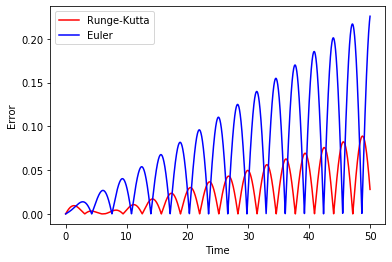

Euler method : 1.1908376007230663
Runge-Kutta method : 0.9369539252758001
Analytical solution : 0.9649660284921133


In [19]:
yRange = 0
tmax = 50.0
n = 6000

collect_plot_data(tmax, n)
print("Euler method :", step(Euler_step, 1, tmax, n))
print("Runge-Kutta method :", step(RungeKutta_step, 1, tmax, n))
print("Analytical solution :", analytical_solution(1, yRange, tmax))